In [1]:
import json
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

In [2]:
DATASET_PATH = "data.json"

# load data

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # convert  lists to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

inputs, targets = load_data(dataset_path=DATASET_PATH)

print(inputs.shape, targets.shape)

(9996, 130, 13) (9996,)


In [3]:
# split data into train and test sets

inputs_train, inputs_test,targets_train, targets_test = train_test_split(inputs, 
                                                                         targets, test_size=0.3)

print(inputs_train.shape, inputs_test.shape,targets_train.shape, targets_test.shape)

(6997, 130, 13) (2999, 130, 13) (6997,) (2999,)


In [4]:
# build the network architecture

model = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape =(inputs.shape[1], inputs.shape[2])),
    # hidden layer
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [5]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", 
              metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train network
history = model.fit(x= inputs_train, y=targets_train,
         epochs=100,
         batch_size = 32,
         validation_data=[inputs_test, targets_test])

Epoch 1/100
219/219 [==============================] - 2s 8ms/step - loss: 9.5509 - accuracy: 0.2984 - val_loss: 4.3361 - val_accuracy: 0.3601
Epoch 2/100
219/219 [==============================] - 2s 8ms/step - loss: 3.5007 - accuracy: 0.3927 - val_loss: 3.1410 - val_accuracy: 0.3731
Epoch 3/100
219/219 [==============================] - 2s 7ms/step - loss: 2.3666 - accuracy: 0.4575 - val_loss: 2.7068 - val_accuracy: 0.4225
Epoch 4/100
219/219 [==============================] - 2s 8ms/step - loss: 1.8927 - accuracy: 0.5205 - val_loss: 2.6284 - val_accuracy: 0.4438
Epoch 5/100
219/219 [==============================] - 2s 9ms/step - loss: 1.5949 - accuracy: 0.5621 - val_loss: 2.3612 - val_accuracy: 0.4458
Epoch 6/100
219/219 [==============================] - 2s 8ms/step - loss: 1.3745 - accuracy: 0.6047 - val_loss: 2.2528 - val_accuracy: 0.4802
Epoch 7/100
219/219 [==============================] - 2s 7ms/step - loss: 1.0916 - accuracy: 0.6596 - val_loss: 2.1135 - val_accuracy: 0.4868

Epoch 58/100
219/219 [==============================] - 1s 6ms/step - loss: 0.1431 - accuracy: 0.9583 - val_loss: 2.9862 - val_accuracy: 0.5972
Epoch 59/100
219/219 [==============================] - 1s 6ms/step - loss: 0.0985 - accuracy: 0.9690 - val_loss: 2.6670 - val_accuracy: 0.6112
Epoch 60/100
219/219 [==============================] - 1s 6ms/step - loss: 0.0318 - accuracy: 0.9909 - val_loss: 2.6127 - val_accuracy: 0.6279
Epoch 61/100
219/219 [==============================] - 1s 6ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 2.5966 - val_accuracy: 0.6292
Epoch 62/100
219/219 [==============================] - 1s 6ms/step - loss: 0.0067 - accuracy: 0.9981 - val_loss: 2.5928 - val_accuracy: 0.6419
Epoch 63/100
219/219 [==============================] - 1s 6ms/step - loss: 0.1310 - accuracy: 0.9676 - val_loss: 3.2229 - val_accuracy: 0.5622
Epoch 64/100
219/219 [==============================] - 1s 7ms/step - loss: 0.2427 - accuracy: 0.9261 - val_loss: 3.1087 - val_accuracy:

In [6]:
# plot history
def plot_history(history):
    fig, axs = plt.subplots(2)
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="train_accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # create errot subplot
    axs[1].plot(history.history["loss"], label="train_error")
    axs[1].plot(history.history["val_loss"], label="test_error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

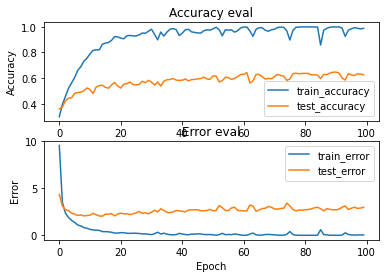

In [8]:
plot_history(history)

In [7]:
# Model overfitting can try a couple things
#1. Simpler, less complex model - less layers, less neurons
#2. More data, data augmentation - pitch shifting, noise, block some frames, time stretching etc.
#3. Early stopping - stop when test error does not increase for certain # of iterations
#4. Drop out - rely on less of the neurons/connections
#5. Regularization - L1 or L2 to punish large weights models

In [13]:
# build the network architecture - second model address overfitting

model2 = keras.Sequential([
    #input layer
    keras.layers.Flatten(input_shape =(inputs.shape[1], inputs.shape[2])),
    keras.layers.Dropout(0.3),
    
    # 1st dense layer
    keras.layers.Dense(512, activation="relu",
                       kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.Dropout(0.3),
    
     # 1st dense layer
    keras.layers.Dense(1024, activation="relu",
                       kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 1st dense layer
    keras.layers.Dense(512, activation="relu",
                       kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 2nd dense layer
    keras.layers.Dense(256, activation="relu",
                       kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 3rd dense layer
    keras.layers.Dense(64, activation="relu",
                       kernel_regularizer=keras.regularizers.L2(0.001)),
    keras.layers.Dropout(0.3), 
    
    # output layer
    keras.layers.Dense(10, activation="softmax"),
])

In [14]:
# compile second model
optimizer2 = keras.optimizers.Adam()
model2.compile(optimizer=optimizer2, 
              loss="sparse_categorical_crossentropy", 
            metrics="accuracy"
            )
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1690)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               865792    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1024)              525312    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)              

In [15]:
# train the second model
history2 = model2.fit(x = inputs_train,
          y= targets_train, 
           batch_size=32,
           epochs = 100,
           validation_data=[inputs_test, targets_test]
          )

Epoch 1/100
219/219 [==============================] - 6s 24ms/step - loss: 9.0648 - accuracy: 0.0930 - val_loss: 4.8095 - val_accuracy: 0.1040
Epoch 2/100
219/219 [==============================] - 5s 25ms/step - loss: 4.7876 - accuracy: 0.1029 - val_loss: 4.6944 - val_accuracy: 0.0850
Epoch 3/100
219/219 [==============================] - 5s 25ms/step - loss: 4.6478 - accuracy: 0.1070 - val_loss: 4.5674 - val_accuracy: 0.0850
Epoch 4/100
219/219 [==============================] - 6s 26ms/step - loss: 4.5057 - accuracy: 0.1060 - val_loss: 4.4339 - val_accuracy: 0.0850
Epoch 5/100
219/219 [==============================] - 6s 25ms/step - loss: 4.3751 - accuracy: 0.1056 - val_loss: 4.3007 - val_accuracy: 0.0850
Epoch 6/100
219/219 [==============================] - 5s 25ms/step - loss: 4.2347 - accuracy: 0.1065 - val_loss: 4.1676 - val_accuracy: 0.0850
Epoch 7/100
219/219 [==============================] - 6s 25ms/step - loss: 4.1079 - accuracy: 0.1069 - val_loss: 4.0394 - val_accuracy:

219/219 [==============================] - 5s 24ms/step - loss: 1.8353 - accuracy: 0.3612 - val_loss: 1.7958 - val_accuracy: 0.3775
Epoch 58/100
219/219 [==============================] - 5s 24ms/step - loss: 1.8359 - accuracy: 0.3716 - val_loss: 1.8200 - val_accuracy: 0.3705
Epoch 59/100
219/219 [==============================] - 5s 25ms/step - loss: 1.8282 - accuracy: 0.3684 - val_loss: 1.8915 - val_accuracy: 0.3414
Epoch 60/100
219/219 [==============================] - 6s 26ms/step - loss: 1.8144 - accuracy: 0.3637 - val_loss: 1.8414 - val_accuracy: 0.3708
Epoch 61/100
219/219 [==============================] - 5s 25ms/step - loss: 1.8252 - accuracy: 0.3674 - val_loss: 1.8099 - val_accuracy: 0.3768
Epoch 62/100
219/219 [==============================] - 5s 24ms/step - loss: 1.8256 - accuracy: 0.3679 - val_loss: 1.8103 - val_accuracy: 0.3728
Epoch 63/100
219/219 [==============================] - 5s 25ms/step - loss: 1.8445 - accuracy: 0.3614 - val_loss: 1.7893 - val_accuracy: 0.387

In [11]:
# visualize the second model

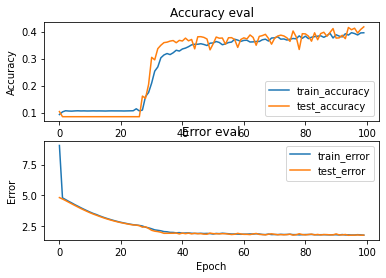

In [16]:
plot_history(history2)